In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SSA import SSA

In [2]:
df = pd.read_csv("../Data/Illustration Data/data_to_denoise.csv")
x = np.array(df.x)
y = np.array(df.y)
original_data = np.sin(5 * x) + 1 / 4 * (x ** 2)

test_size = -100

train_data = y[:test_size]
test_data = y[test_size:]

train_od = original_data[:test_size]
test_od = original_data[test_size:]

train_dates = x[:test_size]
test_dates = x[test_size:]

y.shape, train_data.shape, train_dates.shape, test_data.shape, test_dates.shape

((2000,), (1900,), (1900,), (100,), (100,))

In [ ]:
N = len(train_data)
L = 20
K = N - L + 1
r = None

components = SSA.get_components(train_data, L)

In [ ]:
plt.figure(figsize= (18, 5))
plt.grid(True)
for ind, x in enumerate(components):
    name = ""
    if ind == 0:
        name = f"Компонента: {ind + 1}"

    plt.plot(train_dates, x, label= name)
plt.plot(train_dates, train_data, label= "Исходные данные", alpha= 0.5, color= "cornflowerblue")
plt.plot(train_dates, train_od, label= "Исходные данные (без шума)", alpha= 0.5, color= "red")
plt.legend(loc= "best")
plt.show()

In [ ]:
components2 = pd.DataFrame(np.concatenate([train_dates.reshape(-1, 1), components.T], axis= 1))
components2.columns = ["x"] + [f"y{i + 1}" for i in range(components2.shape[1] - 1)]
components2.to_csv("components.csv", index=False)

In [ ]:
contribution = SSA.get_contribution(np.linalg.svd(SSA.x_to_Hankelian(train_data, L, K))[1])

In [ ]:
contribution

In [ ]:
contribution2 = pd.DataFrame({
    "x": np.arange(1, len(contribution[0]) + 1),
    "each": contribution[0],
    "cumsum": contribution[1]
})

In [ ]:
contribution2.to_csv("contribution.csv", index= False)

In [ ]:
hankelian = SSA.x_to_Hankelian(train_data, L)
d = np.linalg.matrix_rank(hankelian)

In [ ]:
W_corr = SSA.get_W_corr_matrix(SSA.get_components(train_data, L), d, K, L)

In [ ]:
W_corr

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt


vegetables = np.arange(1, 21) #["cucumber", "tomato", "lettuce", "asparagus", "potato", "wheat", "barley"]
farmers = np.arange(1, 21) #["Farmer Joe", "Upland Bros.", "Smith Gardening", "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = W_corr.round(2)

fig, ax = plt.subplots(figsize= (18, 9))
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        # if i != j:
        if harvest[i, j] > 0.8:
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="black", fontweight= "bold")
        else:
            text = ax.text(j, i, harvest[i, j],
                           ha="center", va="center", color="w", fontweight= "bold")

# ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.savefig("W_corr.png", dpi= 230)
plt.show()

In [ ]:
forecast = SSA.forecast(train_data, K, abs(test_size), 18)

In [ ]:
plt.figure(figsize= (18, 4.5))
plt.grid(True)
plt.plot(train_dates[-100:], train_data[-100:], label= "Train наблюдения")
plt.plot(test_dates, test_data, label= "Test наблюдения", color= "green")
plt.plot(test_dates, test_od, label= "Test наблюдения (без шума)", color= "red")
plt.plot(test_dates, forecast, label= "Test предсказания", color= "orange")
# plt.axvline(x = 4.5, c= "purple", label = 'Начало прогноза')
plt.legend(loc= "lower left")
plt.savefig("forecast_100.png", dpi= 230)
plt.show()

In [ ]:
# далее очистка от шума

In [10]:
denoised = SSA.multiple_stage_denoising(y, L= 2)

Dividing loop:   0%|          | 0/2000 [00:00<?, ?it/s]

In [11]:
denoised[1].shape, x.shape, y.shape, original_data.shape

((2000,), (2000,), (2000,), (2000,))

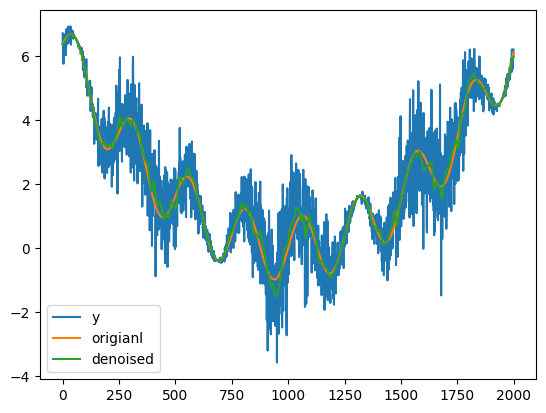

In [12]:
data = pd.DataFrame({
    # "x": x,
    "y": y,
    "origianl": original_data,
    "denoised": denoised[1]
})
data.plot();

In [6]:
# data.to_csv("denoised.csv", index= False)